In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"G:\Tourism-Package\Data/travel_dataset_cleaned.csv")
df

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,...,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,...,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,...,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,...,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,...,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,...,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,...,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,...,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,...,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,...,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
corr_target = df.corr(numeric_only=True)["ProdTaken"].sort_values(ascending=False)
print(corr_target)

ProdTaken                   1.000000
Passport                    0.260844
NumberOfFollowups           0.111560
PreferredPropertyStar       0.098704
CityTier                    0.086852
DurationOfPitch             0.076481
CustomerID                  0.056506
Unnamed: 0                  0.056506
PitchSatisfactionScore      0.051394
NumberOfTrips               0.019709
NumberOfPersonVisiting      0.009627
NumberOfChildrenVisiting    0.008009
OwnCar                     -0.011508
MonthlyIncome              -0.126420
Age                        -0.143753
Name: ProdTaken, dtype: float64


In [4]:
# Remove unwanted columns first
df = df.drop(columns=["CustomerID", "Unnamed: 0"], errors='ignore')

# Get correlation
corr_target = df.corr(numeric_only=True)["ProdTaken"]

# Select features with |correlation| > 0.05
important_features = corr_target[abs(corr_target) > 0.05].index.tolist()

# Remove target
important_features.remove("ProdTaken")

print("Selected Important Features:")
print(important_features)

# Create X and y
X = df[important_features]
y = df["ProdTaken"]

Selected Important Features:
['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'MonthlyIncome']


In [5]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:")
print(cat_cols)

Categorical Columns:
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


C:\Users\Gayatri\AppData\Local\Temp\ipykernel_21308\284872804.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns.tolist()


In [6]:
# Apply One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)
X.head()

Shape after encoding: (4888, 8)


,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,Passport,PitchSatisfactionScore,MonthlyIncome
0,41.0,3,6.0,3.0,3.0,1,2,20993.0
1,49.0,1,14.0,4.0,4.0,0,3,20130.0
2,37.0,1,8.0,4.0,3.0,1,3,17090.0
3,33.0,1,9.0,3.0,3.0,1,5,17909.0
4,36.0,1,8.0,3.0,4.0,0,5,18468.0


### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # important because dataset is imbalanced
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (3910, 8)
Testing shape: (978, 8)


### Applying SMOTE
+ The dataset is imbalanced (~18%).

In [8]:
!pip install imbalanced-learn


   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [9]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: ProdTaken
0    3174
1     736
Name: count, dtype: int64
After SMOTE: ProdTaken
0    3174
1    3174
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print("SMOTE + Scaling completed ✅")

SMOTE + Scaling completed ✅


### Importing all the Models

In [14]:
!pip install xgboost

  Using cached xgboost-3.2.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 586.8 kB/s eta 0:02:53
   ---------------------------------------- 0.8/101.7 MB 633.5 kB/s eta 0:02:40
   ---------------------------------------- 0.8/101.7 MB 633.5 kB/s eta 0:02:40
   ---------------------------------------- 0.8/101.7 MB 633.5 kB/s eta 0:02:40
   ---------------------------------------- 1.0/101.7 MB 614.9 kB/s eta 0:02:44
   ---------------------------------------- 1.0/101.7 MB 614.9 kB/s eta 0:02:44
    --------------------

### Import Models

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

### Initialize Models

In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

### Train and Evaluate

In [19]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import pandas as pd

### Compare Model Performance

In [20]:
results = []

for name, model in models.items():
    
    # Train model
    model.fit(X_train_smote_scaled, y_train_smote)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]   # For ROC-AUC
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results.append([name, acc, precision, recall, f1, roc_auc])
    
    print(f"\n{name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression
Confusion Matrix:
[[508 286]
 [ 66 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       794
           1       0.29      0.64      0.40       184

    accuracy                           0.64       978
   macro avg       0.59      0.64      0.57       978
weighted avg       0.77      0.64      0.68       978


KNN
Confusion Matrix:
[[619 175]
 [ 58 126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       794
           1       0.42      0.68      0.52       184

    accuracy                           0.76       978
   macro avg       0.67      0.73      0.68       978
weighted avg       0.82      0.76      0.78       978


Naive Bayes
Confusion Matrix:
[[477 317]
 [ 67 117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71       794
   

c:\Users\Gayatri\anaconda3\envs\tourism\Lib\site-packages\xgboost\training.py:200: UserWarning: [20:40:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost
Confusion Matrix:
[[755  39]
 [ 84 100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       794
           1       0.72      0.54      0.62       184

    accuracy                           0.87       978
   macro avg       0.81      0.75      0.77       978
weighted avg       0.87      0.87      0.87       978



In [21]:
results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"
])

results_df = results_df.sort_values(by="F1 Score", ascending=False)

print("\nModel Comparison Table:")
print(results_df)


Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
4        Random Forest  0.889571   0.771429  0.586957  0.666667  0.895442
3        Decision Tree  0.866053   0.633166  0.684783  0.657963  0.796422
6              XGBoost  0.874233   0.719424  0.543478  0.619195  0.875048
1                  KNN  0.761759   0.418605  0.684783  0.519588  0.795819
5    Gradient Boosting  0.807771   0.486301  0.385870  0.430303  0.744884
0  Logistic Regression  0.640082   0.292079  0.641304  0.401361  0.684269
2          Naive Bayes  0.607362   0.269585  0.635870  0.378641  0.670614


### Plot ROC Curves (All Models Comparison)

c:\Users\Gayatri\anaconda3\envs\tourism\Lib\site-packages\xgboost\training.py:200: UserWarning: [20:46:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


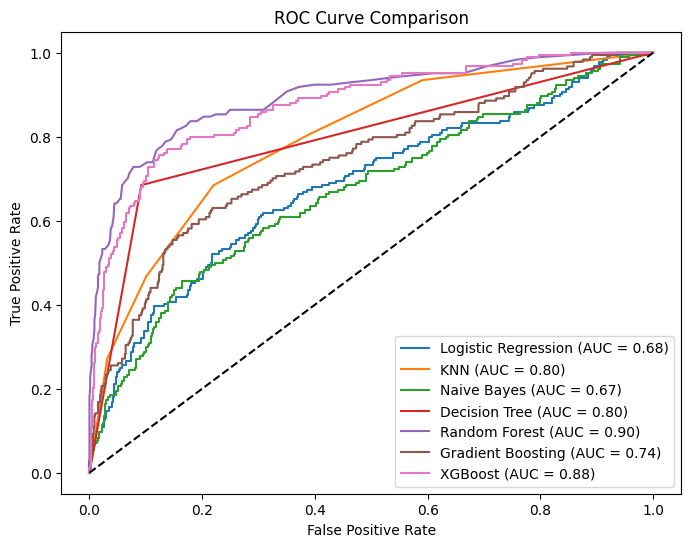

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    
    model.fit(X_train_smote_scaled, y_train_smote)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Feature Importance (Random Forest)

                  Feature  Importance
7           MonthlyIncome    0.196303
0                     Age    0.173221
4   PreferredPropertyStar    0.166765
3       NumberOfFollowups    0.161937
2         DurationOfPitch    0.161729
6  PitchSatisfactionScore    0.061196
1                CityTier    0.039675
5                Passport    0.039174


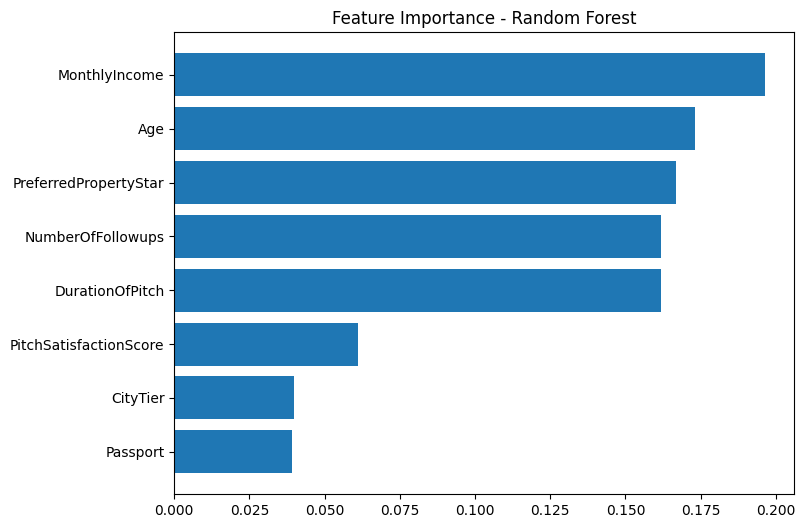

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote_scaled, y_train_smote)

# Extract feature importance
importance = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)

# Plot
plt.figure(figsize=(8,6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.show()

### Hyperparameter Tuning (Random Forest)

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train_smote_scaled, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.8970190120365444


### Evaluate Trained Model

In [26]:
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:,1]))

Accuracy: 0.9008179959100204
F1 Score: 0.7069486404833837
ROC AUC: 0.8970300350454495


### Save Best Model

In [27]:
import joblib

joblib.dump(best_rf, "best_random_forest_model.pkl")
print("Model saved successfully ✅")

Model saved successfully ✅
